In [18]:
# Import Dependencies
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

Populating the interactive namespace from numpy and matplotlib


In [19]:
# Use Pandas data frame to read csv data and read the first data
enrollment_df1 = pd.read_csv("enrollmentByYear_for_CombinedPlot.csv")
employment_df1 = pd.read_csv("employment_df_for_CombinedPlot.csv")
completion_df1 = pd.read_csv("ComprehensiveData_2005-17_v1.csv")

## Enrollment data

In [20]:
enrollment_df1.head()

,year,EF2001D1.Grand total
0,2001,17965501.0
1,2002,18774604.0
2,2003,19385482.0
3,2004,19493543.0
4,2005,19792638.0


In [21]:
# Rename Columns in Enrollment data set
enrollment_df2 = enrollment_df1.rename(columns = {"EF2001D1.Grand total":"Total Enrollment"})
enrollment_df2.head()

,year,Total Enrollment
0,2001,17965501.0
1,2002,18774604.0
2,2003,19385482.0
3,2004,19493543.0
4,2005,19792638.0


In [22]:
# Select Desired Columns in FINAL Enrollment data set
enrollment_df3 = enrollment_df2[['year','Total Enrollment']]
enrollment_df3.head()

,year,Total Enrollment
0,2001,17965501.0
1,2002,18774604.0
2,2003,19385482.0
3,2004,19493543.0
4,2005,19792638.0


## Employment data

In [23]:
# find Column names in Employment data set
employment_df1.columns

Index(['Unnamed: 0', 'Year', 'Initial Jobless Claims', 'Unemployment Rate',
       'Labor Force Participation', 'Unemployment Annual Rate of Change',
       'Participation Annual Rate of Change',
       'Jobless Claims Annual Rate of Change'],
      dtype='object')

In [24]:
# Select Desired Columns in Employment data set
employment_df2 = employment_df1[['Year','Initial Jobless Claims']]
employment_df2.head()

,Year,Initial Jobless Claims
0,2000,346000
1,2001,405246
2,2002,404283
3,2003,402154
4,2004,342117


In [25]:
# Rename Columns in Employment data set
employment_df3 = employment_df2.rename(columns = {"Year":"year", "Initial Jobless Claims":"Total Unemployment"})
employment_df3.head()

,year,Total Unemployment
0,2000,346000
1,2001,405246
2,2002,404283
3,2003,402154
4,2004,342117


## Completion data

In [26]:
# find Column names in Completion data set
completion_df1.columns

Index(['unitid', 'institution name', 'year', 'DFR2005.Associate's degree',
       'DFR2005.Bachelor's degree', 'DFR2005.Master's degree',
       'DFR2005.Certificates of less-than 1-year',
       'DFR2005.Certificates of 1 but less than 2 years', 'Unnamed: 8'],
      dtype='object')

In [27]:
# Select Desired Columns in Completion data set
completion_df2 = completion_df1[["year","DFR2005.Bachelor's degree"]]
completion_df2.head()

,year,DFR2005.Bachelor's degree
0,2005.0,600.0
1,2005.0,1622.0
2,2005.0,798.0
3,2005.0,2931.0
4,2005.0,3917.0


In [28]:
# convert NaN to '0' value in Completion data set
completion_df2.fillna(value=0)

,year,DFR2005.Bachelor's degree
0,2005.0,600.0
1,2005.0,1622.0
2,2005.0,798.0
3,2005.0,2931.0
4,2005.0,3917.0
5,2005.0,299.0
6,2005.0,9.0
7,2005.0,582.0
8,2005.0,0.0
9,2005.0,57.0


In [29]:
#COMPLETION: Rename
completion_df3 = completion_df2.rename(columns = {"DFR2005.Bachelor's degree":"Bachelors Degree"})
completion_df3.head()

,year,Bachelors Degree
0,2005.0,600.0
1,2005.0,1622.0
2,2005.0,798.0
3,2005.0,2931.0
4,2005.0,3917.0


In [30]:
completion_df4 = completion_df3.groupby(["year"])["Bachelors Degree"].sum().astype(int)
completion_df4.head()

year
2005.0    1316168
2006.0    1347340
2007.0    1373060
2008.0    1404895
2009.0    1433088
Name: Bachelors Degree, dtype: int32

In [31]:
# store data from data series to data frame
completion_df4 = pd.DataFrame({'year':completion_df4.index, "Total Completion":completion_df4.values})
completion_df4.head()

,year,Total Completion
0,2005.0,1316168
1,2006.0,1347340
2,2007.0,1373060
3,2008.0,1404895
4,2009.0,1433088


## Combine 3 datasets for analysis

In [32]:
combined_df1 = pd.merge(pd.merge(employment_df3, enrollment_df3, on="year"), completion_df4, on="year")
combined_df1

,year,Total Unemployment,Total Enrollment,Total Completion
0,2005,330988,19792638.0,1316168
1,2006,312092,19957444.0,1347340
2,2007,320683,20240347.0,1373060
3,2008,417708,20714313.0,1404895
4,2009,574279,21913240.0,1433088
5,2010,458808,23155497.0,1467433
6,2011,408679,23766408.0,1511783
7,2012,374863,23767003.0,1565139
8,2013,343625,23436250.0,1587285
9,2014,308342,23508832.0,1611376


In [33]:
combined_df2 = combined_df1.set_index('year')
combined_df2

,Total Unemployment,Total Enrollment,Total Completion
year,,,
2005,330988,19792638.0,1316168
2006,312092,19957444.0,1347340
2007,320683,20240347.0,1373060
2008,417708,20714313.0,1404895
2009,574279,21913240.0,1433088
2010,458808,23155497.0,1467433
2011,408679,23766408.0,1511783
2012,374863,23767003.0,1565139
2013,343625,23436250.0,1587285


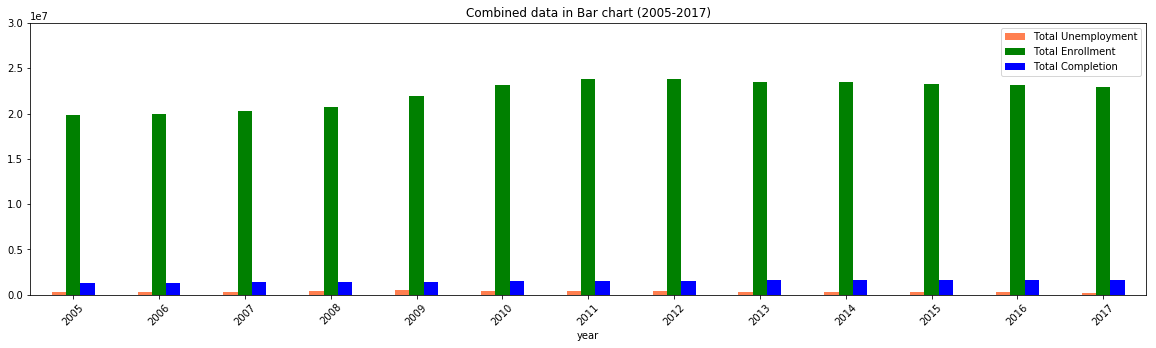

<Figure size 432x288 with 0 Axes>

In [47]:
multi_plot = combined_df2.plot(kind="bar", figsize=(20,5), color=['coral', 'green', 'blue'])
multi_plot.set_xticklabels(combined_df2.index, rotation=45)
plt.ylim(0, 30000000)
plt.title("Combined data in Bar chart (2005-2017)")
plt.savefig("Combined data in Bar chart (2005-2017)")
plt.show()
plt.tight_layout()

In [48]:
# selecting data type from combined_df2 for bubble plots
type_A = combined_df1["Total Completion"]
type_B = combined_df1["Total Enrollment"]
type_C = combined_df1["Total Unemployment"]

# % Unemployment rate for those completed

type_E = type_C/type_A*100
type_E

0     25.147853
1     23.163567
2     23.355352
3     29.732329
4     40.072836
5     31.266027
6     27.032914
7     23.950780
8     21.648601
9     19.135323
10    17.076237
11    15.868493
12    14.492576
dtype: float64

In [49]:
type_d = combined_df1["year"]

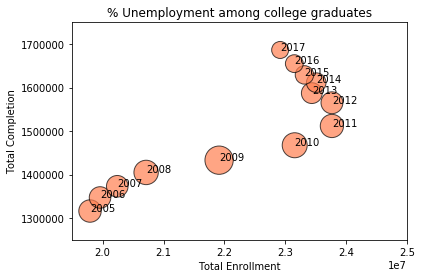

In [57]:
plt.scatter(type_B, type_A, s=(type_E)*20, color = 'coral', alpha = 0.7, edgecolor = "black", linewidths = 1, label = 'year')
plt.xlabel("Total Enrollment")
plt.ylabel("Total Completion")
#plt.text("Note:\nCircle size correlates with driver count per city.")
plt.title("% Unemployment among college graduates")

for i, txt in enumerate(type_d):
     plt.annotate(txt, (type_B[i], type_A[i]))
    
plt.xlim(19500000, 25000000)
plt.ylim(1250000, 1750000) 
plt.savefig("Combined data in BubblePlot (2005-2017)")
plt.show()